In [1]:
# =============================
# 1. Install Ultralytics (YOLOv8)
# =============================
!pip install ultralytics kaggle --upgrade -q

# =============================
# 2. Download Kaggle Dataset
# =============================
import os

# 🔑 Set your Kaggle credentials
os.environ['KAGGLE_USERNAME'] = "shubhampr1504"   # replace with your username
os.environ['KAGGLE_KEY'] = "10a044beb38f1a860b55bf16eb9f259b"   # replace with your key

# Download dataset
!kaggle datasets download -d niravnaik/safety-helmet-and-reflective-jacket
!unzip -q safety-helmet-and-reflective-jacket.zip -d dataset

# =============================
# 3. Check Dataset Structure
# =============================
!ls dataset/safety-Helmet-Reflective-Jacket

# =============================
# 4. Create custom data.yaml
# =============================
yaml_text = """
train: dataset/safety-Helmet-Reflective-Jacket/train/images
val: dataset/safety-Helmet-Reflective-Jacket/valid/images
test: dataset/safety-Helmet-Reflective-Jacket/test/images

nc: 2
names: ['Helmet','Vest']
"""
with open("dataset/safety-Helmet-Reflective-Jacket/data.yaml", "w") as f:
    f.write(yaml_text)

print("✅ data.yaml created successfully")

# =============================
# 5. Train YOLOv8
# =============================
from ultralytics import YOLO

# Load YOLOv8n (nano model, fastest for Colab)
model = YOLO("yolov8n.pt")

# Train
results = model.train(
    data="dataset/safety-Helmet-Reflective-Jacket/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16
)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.2 MB/s eta 0:00:00
Dataset URL: https://www.kaggle.com/datasets

Ultralytics 8.3.181 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/safety-Helmet-Reflective-Jacket/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, 

RuntimeError: Dataset 'dataset/safety-Helmet-Reflective-Jacket/data.yaml' error ❌ Dataset 'dataset/safety-Helmet-Reflective-Jacket/data.yaml' images not found, missing path '/content/dataset/safety-Helmet-Reflective-Jacket/dataset/safety-Helmet-Reflective-Jacket/valid/images'
Note dataset download directory is '/content/datasets'. You can update this in '/root/.config/Ultralytics/settings.json'

In [2]:
import os

# Get absolute paths
base_path = "/content/dataset/safety-Helmet-Reflective-Jacket"
train_path = os.path.join(base_path, "train/images")
val_path   = os.path.join(base_path, "valid/images")
test_path  = os.path.join(base_path, "test/images")

yaml_text = f"""
train: {train_path}
val: {val_path}
test: {test_path}

nc: 2
names: ['Helmet','Vest']
"""

with open(f"{base_path}/data.yaml", "w") as f:
    f.write(yaml_text)

print("✅ Fixed data.yaml created at:", f"{base_path}/data.yaml")
!cat {base_path}/data.yaml

✅ Fixed data.yaml created at: /content/dataset/safety-Helmet-Reflective-Jacket/data.yaml

train: /content/dataset/safety-Helmet-Reflective-Jacket/train/images
val: /content/dataset/safety-Helmet-Reflective-Jacket/valid/images
test: /content/dataset/safety-Helmet-Reflective-Jacket/test/images

nc: 2
names: ['Helmet','Vest']


In [3]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

results = model.train(
    data="/content/dataset/safety-Helmet-Reflective-Jacket/data.yaml",
    epochs=20,
    imgsz=640,
    batch=16
)

Ultralytics 8.3.181 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/safety-Helmet-Reflective-Jacket/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, pl

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,238 parameters, 3,011,222 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1204.4±359.1 MB/s, size: 40.7 KB)


train: Scanning /content/dataset/safety-Helmet-Reflective-Jacket/train/labels... 7350 images, 33 backgrounds, 0 corrupt: 100%|██████████| 7350/7350 [00:03<00:00, 1965.42it/s]


train: New cache created: /content/dataset/safety-Helmet-Reflective-Jacket/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 285.7±249.1 MB/s, size: 49.5 KB)


val: Scanning /content/dataset/safety-Helmet-Reflective-Jacket/valid/labels... 1575 images, 8 backgrounds, 0 corrupt: 100%|██████████| 1575/1575 [00:01<00:00, 979.01it/s] 

val: New cache created: /content/dataset/safety-Helmet-Reflective-Jacket/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.07G      1.243       1.55      1.282         22        640: 100%|██████████| 460/460 [02:07<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:13<00:00,  3.63it/s]


                   all       1575       5292      0.811       0.76      0.828      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.55G      1.223      1.146      1.255         28        640: 100%|██████████| 460/460 [02:07<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:12<00:00,  3.94it/s]


                   all       1575       5292      0.811      0.723      0.814      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.56G       1.21      1.057      1.249         35        640: 100%|██████████| 460/460 [02:02<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:12<00:00,  3.97it/s]


                   all       1575       5292      0.822      0.773      0.854      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.58G      1.177      1.006       1.23         43        640: 100%|██████████| 460/460 [02:03<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:12<00:00,  3.98it/s]


                   all       1575       5292      0.836      0.795      0.874      0.576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20       2.6G      1.142     0.9383       1.21         42        640: 100%|██████████| 460/460 [01:59<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:12<00:00,  3.95it/s]


                   all       1575       5292      0.844      0.794      0.877        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.62G      1.111     0.8922      1.192         24        640: 100%|██████████| 460/460 [02:03<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:13<00:00,  3.75it/s]


                   all       1575       5292      0.856      0.814      0.897      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.63G      1.076     0.8473      1.172         29        640: 100%|██████████| 460/460 [02:05<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:12<00:00,  3.91it/s]

                   all       1575       5292      0.868      0.841      0.912      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.65G      1.066     0.8267      1.167         17        640: 100%|██████████| 460/460 [02:01<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:12<00:00,  3.95it/s]

                   all       1575       5292      0.879      0.845      0.923      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.67G      1.036     0.7888      1.152         38        640: 100%|██████████| 460/460 [02:04<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:12<00:00,  3.95it/s]

                   all       1575       5292        0.9      0.846      0.926      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.69G       1.02     0.7616      1.137         22        640: 100%|██████████| 460/460 [02:02<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:12<00:00,  3.95it/s]

                   all       1575       5292      0.899      0.874      0.939      0.689


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.71G     0.9589     0.6636      1.111         15        640: 100%|██████████| 460/460 [01:59<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:12<00:00,  3.87it/s]

                   all       1575       5292      0.903      0.877      0.943      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.72G      0.944     0.6379      1.107         21        640: 100%|██████████| 460/460 [01:56<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:13<00:00,  3.84it/s]

                   all       1575       5292      0.898      0.884      0.942      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.74G     0.9129     0.6106      1.087         23        640: 100%|██████████| 460/460 [01:59<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:12<00:00,  3.93it/s]

                   all       1575       5292      0.896      0.887      0.946      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.75G      0.895     0.5924      1.075         24        640: 100%|██████████| 460/460 [01:56<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:13<00:00,  3.75it/s]

                   all       1575       5292      0.915      0.886      0.953      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.77G     0.8716     0.5649      1.056         27        640: 100%|██████████| 460/460 [02:01<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:13<00:00,  3.61it/s]

                   all       1575       5292      0.919       0.89      0.955      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.79G     0.8544     0.5483      1.055         34        640: 100%|██████████| 460/460 [01:58<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:12<00:00,  3.90it/s]

                   all       1575       5292      0.913      0.904      0.954      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20       2.8G     0.8296     0.5274       1.04         20        640: 100%|██████████| 460/460 [01:59<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:12<00:00,  3.91it/s]

                   all       1575       5292      0.924      0.897      0.958      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.82G     0.8131     0.5082      1.033         20        640: 100%|██████████| 460/460 [02:00<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:13<00:00,  3.78it/s]

                   all       1575       5292      0.928      0.902      0.962      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.84G     0.7942     0.4947       1.02         36        640: 100%|██████████| 460/460 [01:58<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:12<00:00,  3.95it/s]

                   all       1575       5292      0.921      0.905      0.961      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.86G     0.7725     0.4786      1.011         17        640: 100%|██████████| 460/460 [02:00<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:12<00:00,  3.85it/s]

                   all       1575       5292       0.93      0.903      0.963      0.769



20 epochs completed in 0.750 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.181 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:15<00:00,  3.21it/s]


                   all       1575       5292       0.93      0.902      0.963      0.769
                Helmet       1290       2966      0.944      0.913      0.971       0.77
                  Vest       1317       2326      0.916      0.891      0.956      0.768
Speed: 0.3ms preprocess, 2.2ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train2



0: 640x640 3 Helmets, 4 Vests, 6.0ms
1: 640x640 3 Helmets, 2 Vests, 6.0ms
2: 640x640 4 Helmets, 6.0ms
3: 640x640 1 Helmet, 6.0ms
4: 640x640 4 Helmets, 5 Vests, 6.0ms
5: 640x640 1 Helmet, 1 Vest, 6.0ms
Speed: 3.7ms preprocess, 6.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
📌 Showing YOLOv8 Predictions with bounding boxes


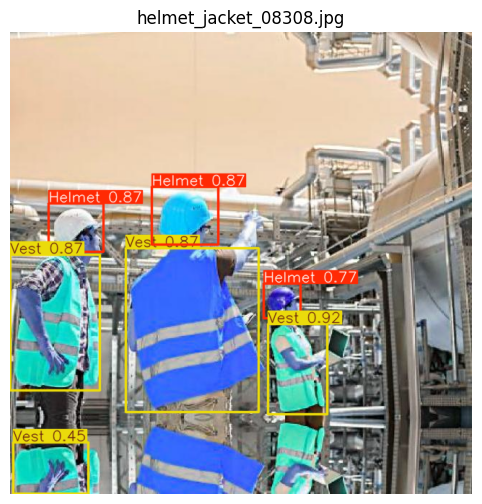

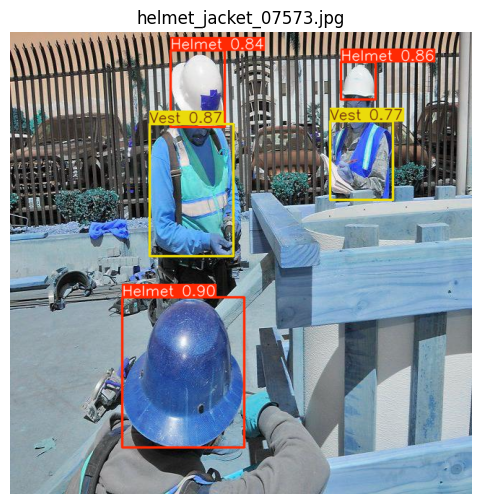

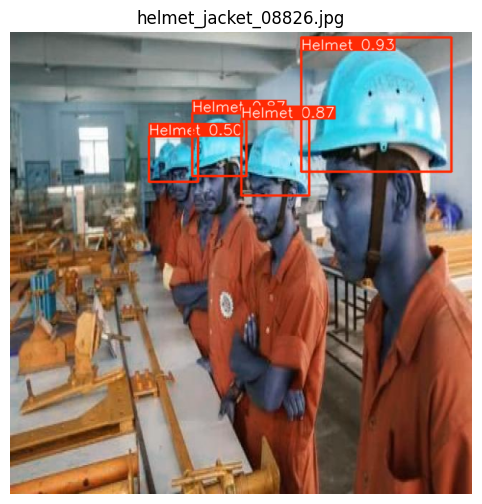

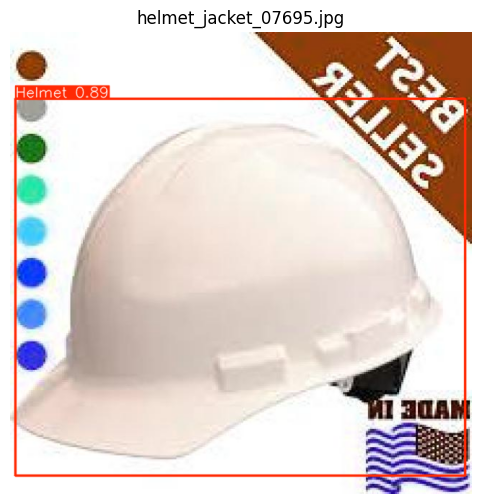

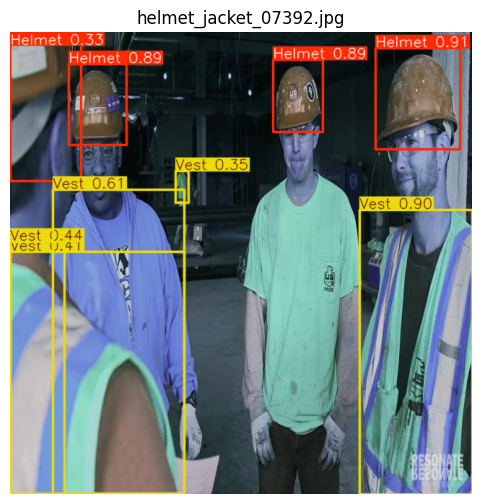

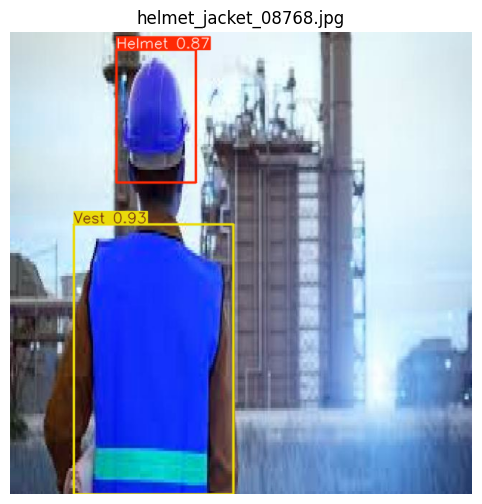

📌 Showing YOLOv8 Predictions (Masked Objects Only)


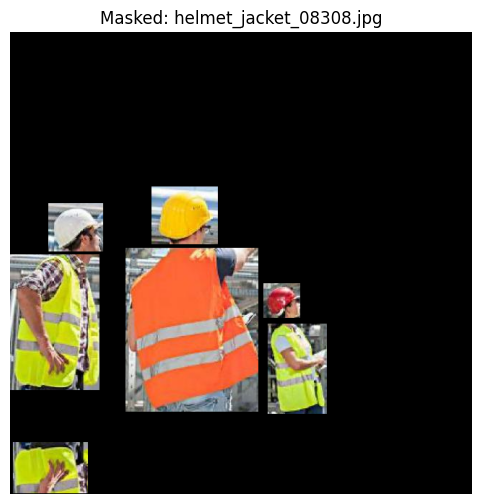

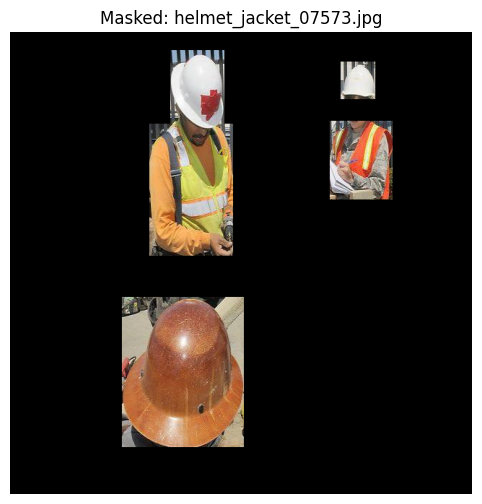

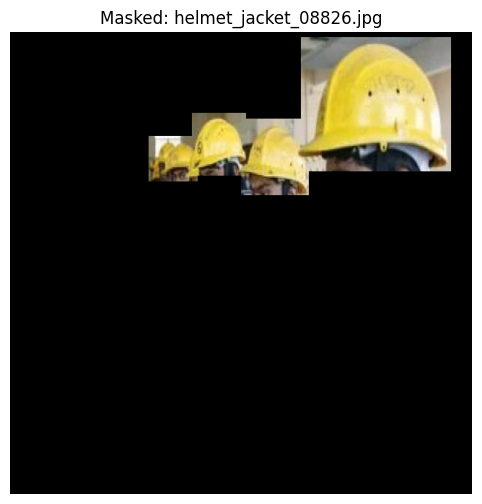

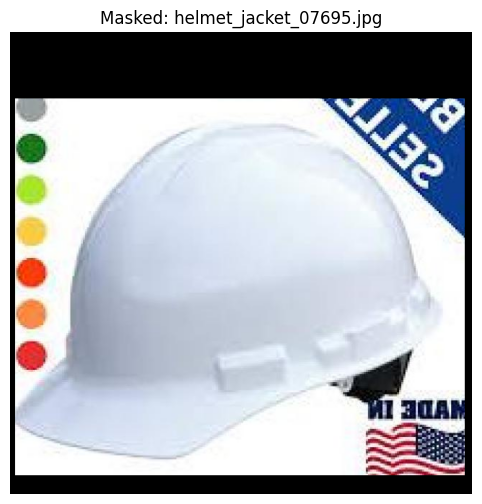

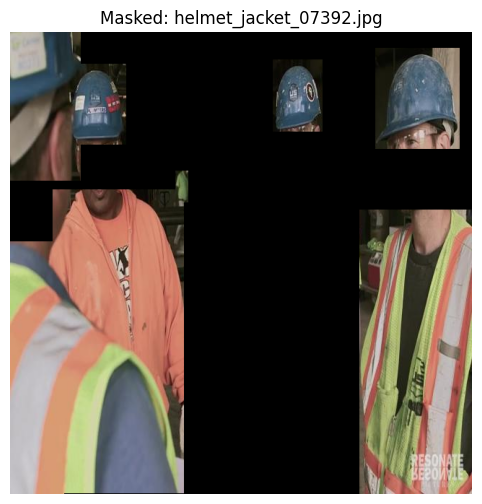

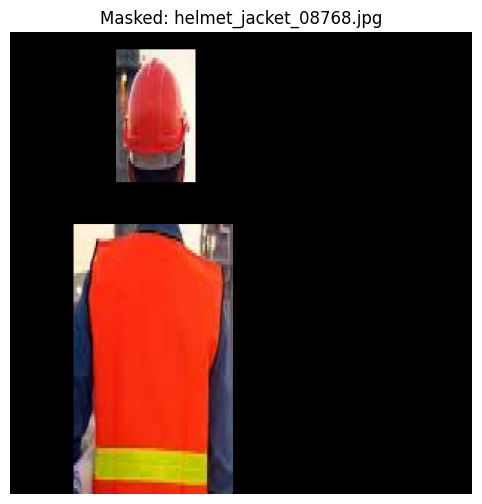

In [5]:
# ===================================
# CELL 6: Visualize YOLOv8 Predictions (Normal + Masked)
# ===================================
import glob
import random
import matplotlib.pyplot as plt
import numpy as np
import cv2
from ultralytics import YOLO
import os

# Load trained model weights (best.pt after training)
trained_model = YOLO("/content/runs/detect/train2/weights/best.pt")

def visualize_predictions(model, dataset_path, subset='test', num_samples=6, imgsz=640):
    img_dir = os.path.join(dataset_path, subset, 'images')
    img_files = glob.glob(f"{img_dir}/*.jpg") + glob.glob(f"{img_dir}/*.png")

    if not img_files:
        print(f"❌ No images found in {img_dir}")
        return

    random.shuffle(img_files)
    sample_imgs = img_files[:num_samples]

    # Run inference
    results = model.predict(sample_imgs, imgsz=imgsz)

    # 1️⃣ Show predictions normally
    print("📌 Showing YOLOv8 Predictions with bounding boxes")
    for r in results:
        plt.figure(figsize=(8, 6))
        plt.imshow(r.plot())   # YOLOv8 built-in plot()
        plt.axis("off")
        plt.title(os.path.basename(r.path))
        plt.show()

    # 2️⃣ Show masked predictions
    print("📌 Showing YOLOv8 Predictions (Masked Objects Only)")
    for r in results:
        img = cv2.imread(r.path)
        mask = np.zeros_like(img)  # start with black image

        for box in r.boxes.xyxy.cpu().numpy():  # xyxy format
            x1, y1, x2, y2 = map(int, box[:4])
            obj = img[y1:y2, x1:x2]  # crop object
            mask[y1:y2, x1:x2] = obj  # paste object back

        # Convert BGR->RGB for matplotlib
        mask_rgb = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(8, 6))
        plt.imshow(mask_rgb)
        plt.axis("off")
        plt.title(f"Masked: {os.path.basename(r.path)}")
        plt.show()

# Run visualization
visualize_predictions(trained_model, "/content/dataset/safety-Helmet-Reflective-Jacket", subset="test", num_samples=6)

In [6]:
from google.colab import files
import shutil

# Zip the folder
shutil.make_archive("runs", 'zip', "/content/runs")

# Download the zipped folder
files.download("runs.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>